# Analisis Prediksi Pergerakan Harga Saham Indo Tambangraya Megah Tbk. Menggunakan Model LSTM Dengan Mempertimbangkan RSI Dan MA 50

Dataset Pergerakan Harga Saham Diambil dari IDX Dengan Kode ITMG dengan rentang 29/07/2019-25/05/2023

In [1]:
###install (Technical Analysis Library di Python)
!pip install ta 
###install library tenserflow
!pip install tensorflow 

import pandas as pd ###manipulasi dan analisis data tabular
import numpy as np ###pengolahan data numerik
import matplotlib.pyplot as plt ###membuat visualisasi, grafik, dan plot data.
import seaborn as sns ### membuat visualisasi data yang lebih menarik dan informatif dengan lebih sedikit kode
import tensorflow as tf ### membangun model jaringan saraf tiruan (neural network) berbasis LSTM (Long Short-Term Memory)
from tensorflow import keras ###pembuatan dan pelatihan model jaringan saraf.
sns.set_style("whitegrid") ###latar belakang plot akan menjadi putih, dan grid akan ditampilkan di belakang plot
plt.style.use("fivethirtyeight") ###visualisasi data yang mirip dengan yang digunakan oleh FiveThirtyEight

###plot Matplotlib ditampilkan dalam notebook secara langsung
%matplotlib inline  
from datetime import datetime ###impor fungsi datetime

from sklearn.preprocessing import MinMaxScaler ###import untuk normalisasi data

from keras.models import Sequential  ###import class untuk neural network
from keras.layers import Dense, LSTM ###Import dense untuk melakukan transformasi linier
import ta ###import technical analysis
import warnings ###mengendalikan pesan peringatan (warnings) yang dapat muncul selama eksekusi kode
warnings.filterwarnings("ignore") ###mengabaikan semua pesan peringatan yang mungkin muncul selama eksekusi kode
from datetime import date ###berguna untuk bekerja dengan tanggal dalam Python

# EDA(Exploration Data Analys)

In [2]:
stock_data = pd.read_csv('ITMG.csv') # untuk read data berupa csv
stock_data= pd.DataFrame(stock_data) 
stock_data 

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,ITMG,2019-07-29 0:00:00,17075.0,17075.0,16875.0,17025.0,809000.0,17075.0,17075.0,16875.0,17025.0,809000.0
1,ITMG,2019-07-30 0:00:00,16750.0,17100.0,16750.0,17100.0,518800.0,16750.0,17100.0,16750.0,17100.0,518800.0
2,ITMG,2019-07-31 0:00:00,16825.0,16850.0,16775.0,16800.0,1769900.0,16825.0,16850.0,16775.0,16800.0,1769900.0
3,ITMG,2019-08-01 0:00:00,16850.0,16900.0,16825.0,16825.0,841100.0,16850.0,16900.0,16825.0,16825.0,841100.0
4,ITMG,2019-08-02 0:00:00,16850.0,16900.0,16700.0,16750.0,876200.0,16850.0,16900.0,16700.0,16750.0,876200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
932,ITMG,2023-05-19 0:00:00,24700.0,26200.0,24700.0,26200.0,4888400.0,24700.0,26200.0,24700.0,26200.0,4888400.0
933,ITMG,2023-05-22 0:00:00,25175.0,25500.0,24850.0,25100.0,2915800.0,25175.0,25500.0,24850.0,25100.0,2915800.0
934,ITMG,2023-05-23 0:00:00,25475.0,25750.0,25300.0,25500.0,1933200.0,25475.0,25750.0,25300.0,25500.0,1933200.0
935,ITMG,2023-05-24 0:00:00,24950.0,25400.0,24775.0,25300.0,1815600.0,24950.0,25400.0,24775.0,25300.0,1815600.0


In [3]:
stock_data.info()  #menampilkan informasi data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     937 non-null    object 
 1   date       937 non-null    object 
 2   close      937 non-null    float64
 3   high       937 non-null    float64
 4   low        937 non-null    float64
 5   open       937 non-null    float64
 6   volume     937 non-null    float64
 7   adjClose   937 non-null    float64
 8   adjHigh    937 non-null    float64
 9   adjLow     937 non-null    float64
 10  adjOpen    937 non-null    float64
 11  adjVolume  937 non-null    float64
dtypes: float64(10), object(2)
memory usage: 88.0+ KB


In [4]:
stock_data.describe() # menghasilkan statistik deskriptif ringkas dari DataFrame

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
count,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,9.370000e+02
mean,20519.183565,20867.049093,20212.059765,19593.329776,3.547652e+06,20519.183565,20867.049093,20212.059765,19593.329776,3.547652e+06
std,11658.640305,11790.144111,11515.570098,12891.837367,2.950977e+06,11658.640305,11790.144111,11515.570098,12891.837367,2.950977e+06
min,6025.000000,6350.000000,5650.000000,0.000000,4.341000e+05,6025.000000,6350.000000,5650.000000,0.000000,4.341000e+05
25%,11650.000000,11900.000000,11450.000000,11650.000000,1.631800e+06,11650.000000,11900.000000,11450.000000,11650.000000,1.631800e+06
50%,15200.000000,15500.000000,14950.000000,15250.000000,2.647400e+06,15200.000000,15500.000000,14950.000000,15250.000000,2.647400e+06
75%,31450.000000,31975.000000,30750.000000,31700.000000,4.380700e+06,31450.000000,31975.000000,30750.000000,31700.000000,4.380700e+06
max,45350.000000,45650.000000,44775.000000,45350.000000,3.175300e+07,45350.000000,45650.000000,44775.000000,45350.000000,3.175300e+07


In [5]:
stock_data.isnull().sum() # menghitung jumlah nilai-nilai yang hilang (NaN, null) dalam setiap kolom dari DataFrame

symbol       0
date         0
close        0
high         0
low          0
open         0
volume       0
adjClose     0
adjHigh      0
adjLow       0
adjOpen      0
adjVolume    0
dtype: int64

In [6]:
stock_data = stock_data.drop(['symbol'],axis=1)#menghapus data frame symbol yaitu ITMG

In [7]:
### kolom 'date' dipecah menjadi dua bagian berdasarkan karakter spasi (" "). n = 1 ,dibagi satu kali
### ini akan menghasilkan DataFrame yang hanya berisi bagian tanggal (tanpa jam) setiap entri dalam kolom 'date'
stock_data['date']= stock_data['date'].str.split(" ", n = 1, expand = True)[0]
### mengonversi bagian tanggal ini menjadi format datetime yang sesuai
stock_data['date']= pd.to_datetime(stock_data['date'])
stock_data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2019-07-29,17075.0,17075.0,16875.0,17025.0,809000.0,17075.0,17075.0,16875.0,17025.0,809000.0
1,2019-07-30,16750.0,17100.0,16750.0,17100.0,518800.0,16750.0,17100.0,16750.0,17100.0,518800.0
2,2019-07-31,16825.0,16850.0,16775.0,16800.0,1769900.0,16825.0,16850.0,16775.0,16800.0,1769900.0
3,2019-08-01,16850.0,16900.0,16825.0,16825.0,841100.0,16850.0,16900.0,16825.0,16825.0,841100.0
4,2019-08-02,16850.0,16900.0,16700.0,16750.0,876200.0,16850.0,16900.0,16700.0,16750.0,876200.0
...,...,...,...,...,...,...,...,...,...,...,...
932,2023-05-19,24700.0,26200.0,24700.0,26200.0,4888400.0,24700.0,26200.0,24700.0,26200.0,4888400.0
933,2023-05-22,25175.0,25500.0,24850.0,25100.0,2915800.0,25175.0,25500.0,24850.0,25100.0,2915800.0
934,2023-05-23,25475.0,25750.0,25300.0,25500.0,1933200.0,25475.0,25750.0,25300.0,25500.0,1933200.0
935,2023-05-24,24950.0,25400.0,24775.0,25300.0,1815600.0,24950.0,25400.0,24775.0,25300.0,1815600.0


# Visualisasi Rata-Rata Close,Open, High,Low, Dan Volume

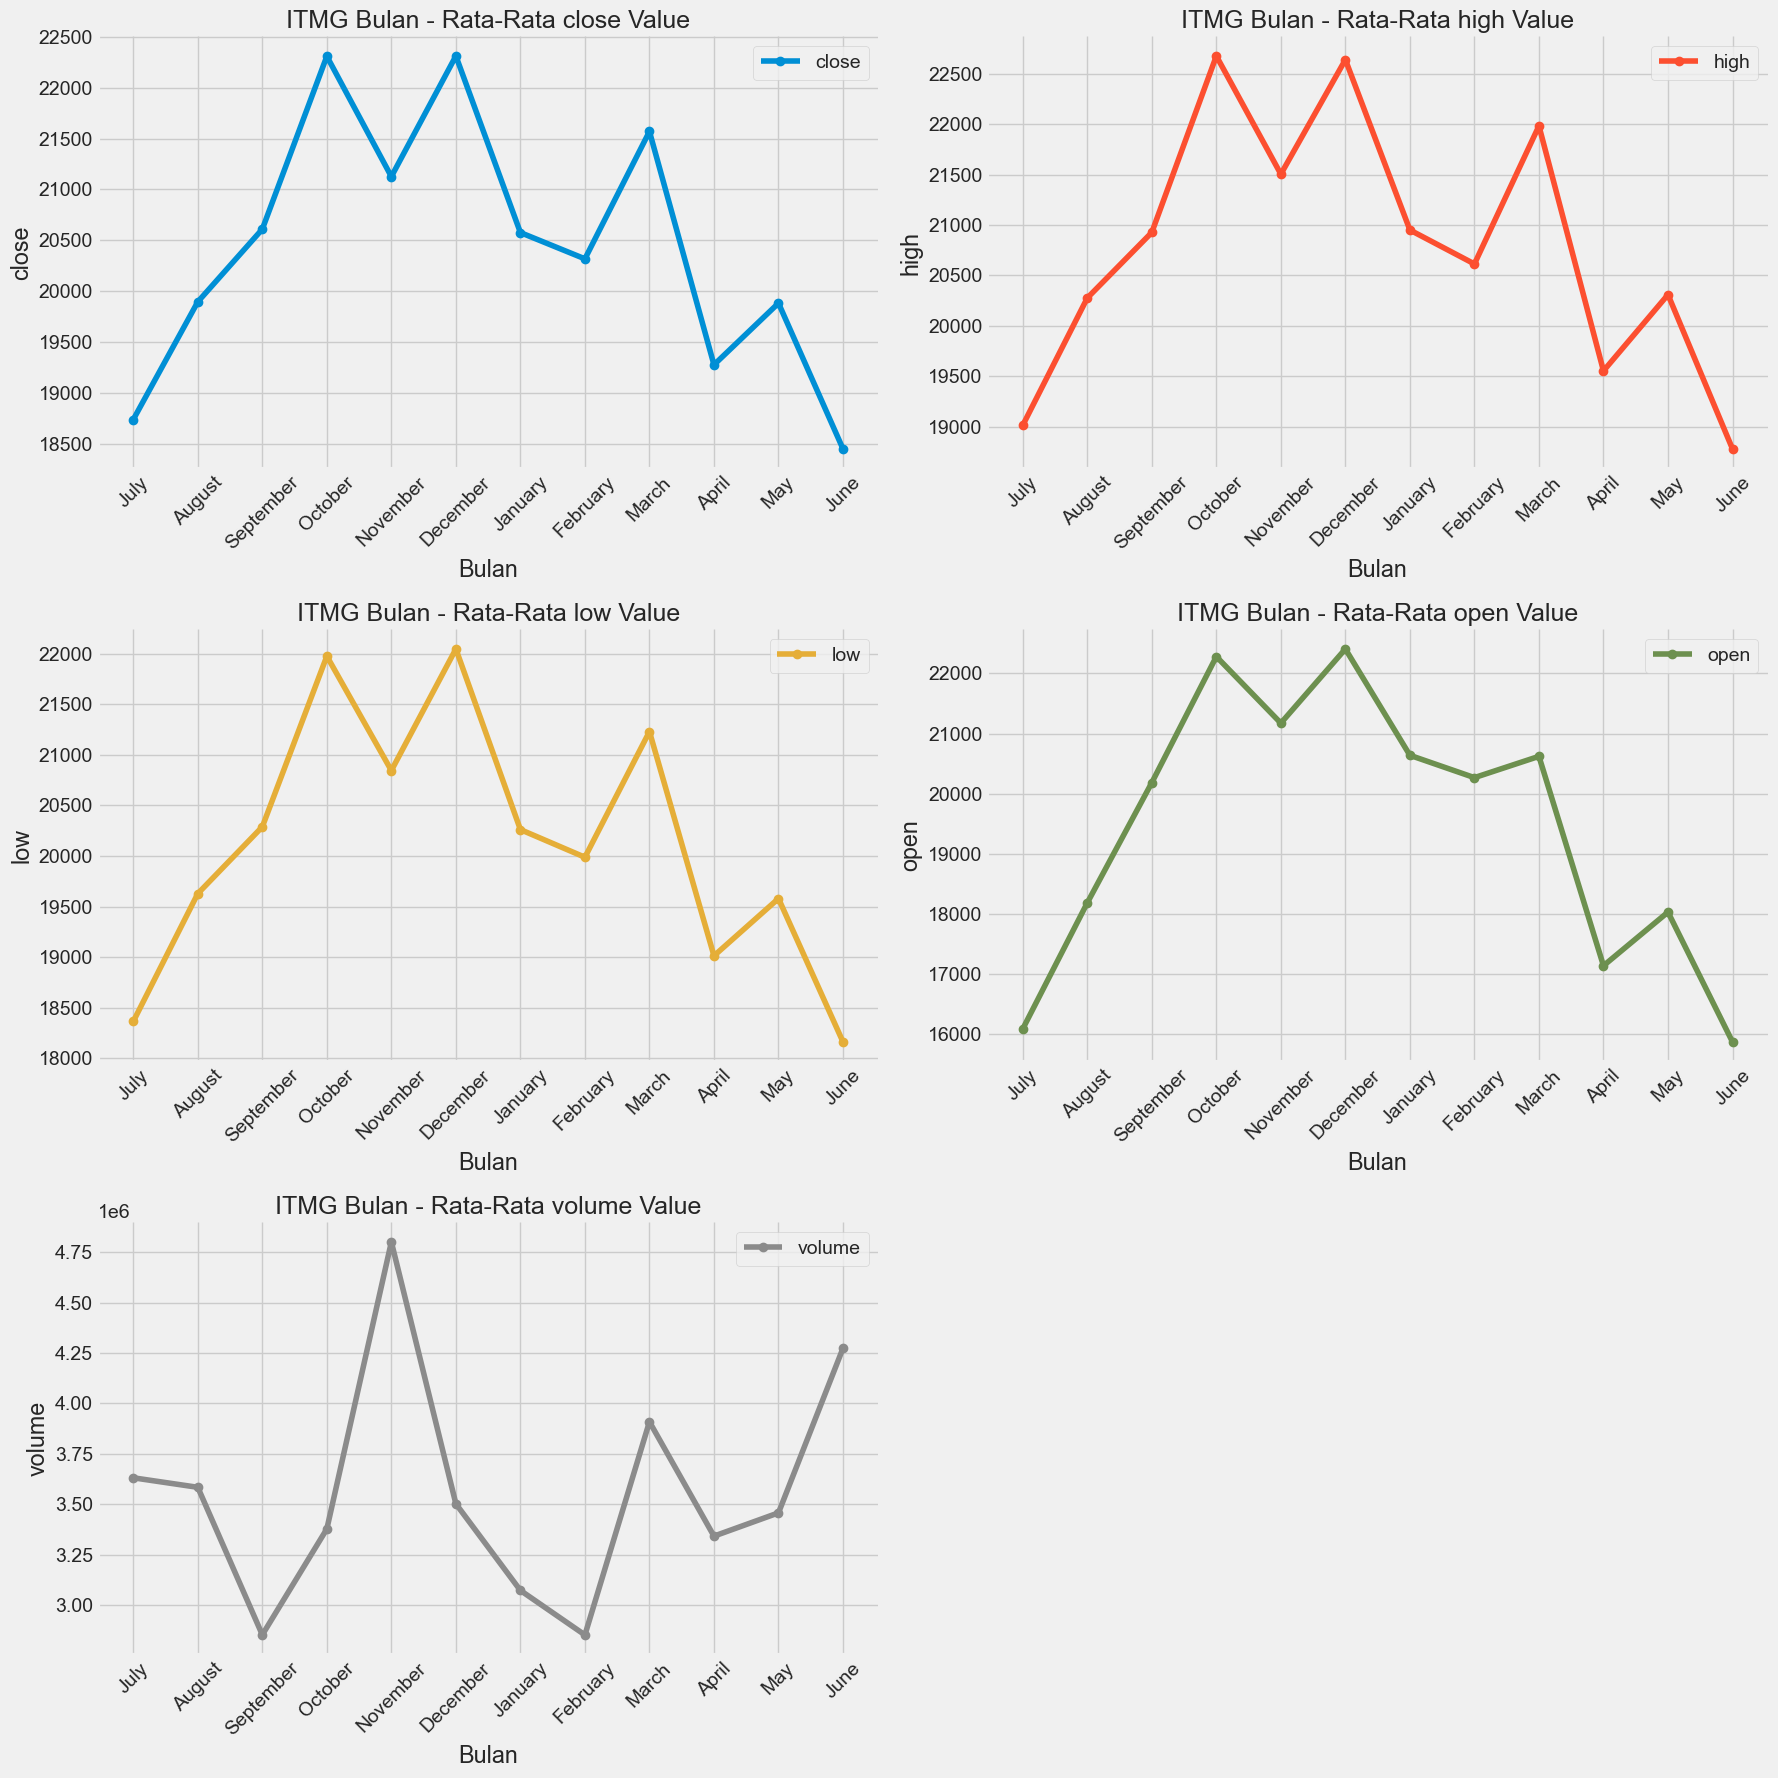

In [9]:
### mengonversi bagian tanggal ini menjadi format datetime yang sesuai
stock_data['date'] = pd.to_datetime(stock_data['date'])

### mengatur kolom 'date' sebagai indeks (index) utama dari DataFrame stock_data.
stock_data.set_index('date', inplace=True)

plt.rcParams['font.size'] = 14     #font size (ukuran huruf) 
plt.rcParams['figure.dpi'] = 100    #resolusi gambar (dots per inch, DPI) 
plt.rcParams['figure.figsize'] = (20, 10)  #mengatur lebar dan tinggi gambar
colors = plt.rcParams["axes.prop_cycle"]() #mengambil siklus warna (color cycle) yang didefinisikan dalam konfigurasi Matplotlib
a1 = 3  # inisialisasi variabel Jumlah baris
a2 = 2  # inisialisasi variabel Jumlah Kolom
a3 = 1  # inisialisasi Plot

# membuat objek gambar (figure) menjadi 18 inch lebar dan 18 inch tinggi
fig = plt.figure(figsize=(18, 18))

#  mendefinisikan daftar nama kolom yang akan diplot pada grafik
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

# Looping setiap kolom
for column in columns_to_plot:
    color = next(colors)["color"] #Warna ini akan digunakan untuk plot garis pada grafik.
    plt.subplot(a1, a2, a3) # membuat subplot dalam gambar  mengatur jumlah baris, jumlah kolom, dan nomor subplot 
    
    # untuk menggambar data dalam bentuk grafik garis. Data yang digunakan adalah rerata (mean) dari kolom yang sedang diiterasi berdasarkan nama bulan
    plt.plot(stock_data.groupby(stock_data.index.month_name(), sort=False).mean()[column], color=color, marker='o')
    # untuk menghapus garis batas atas dan kanan pada subplot, sehingga plot akan terlihat lebih bersih
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # memutar label sumbu x sebesar 45 derajat
    plt.xticks(rotation=45)
    # mengatur judul grafik dengan mencakup nama kolom yang sedang diiterasi
    plt.title(f"ITMG Bulan - Rata-Rata {column} Value", fontsize=18)
    # mengatur label sumbu x dan sumbu y pada grafik
    plt.xlabel('Bulan') 
    plt.ylabel(column)
    # menambahkan legenda (label keterangan) ke plot 
    plt.legend([column])
    # Increment nomor subplot
    a3 = a3 + 1

# mengatur layout atau tata letak dari plot agar sesuai 
plt.tight_layout()
# melihat plot yang dihasilkan
plt.show()

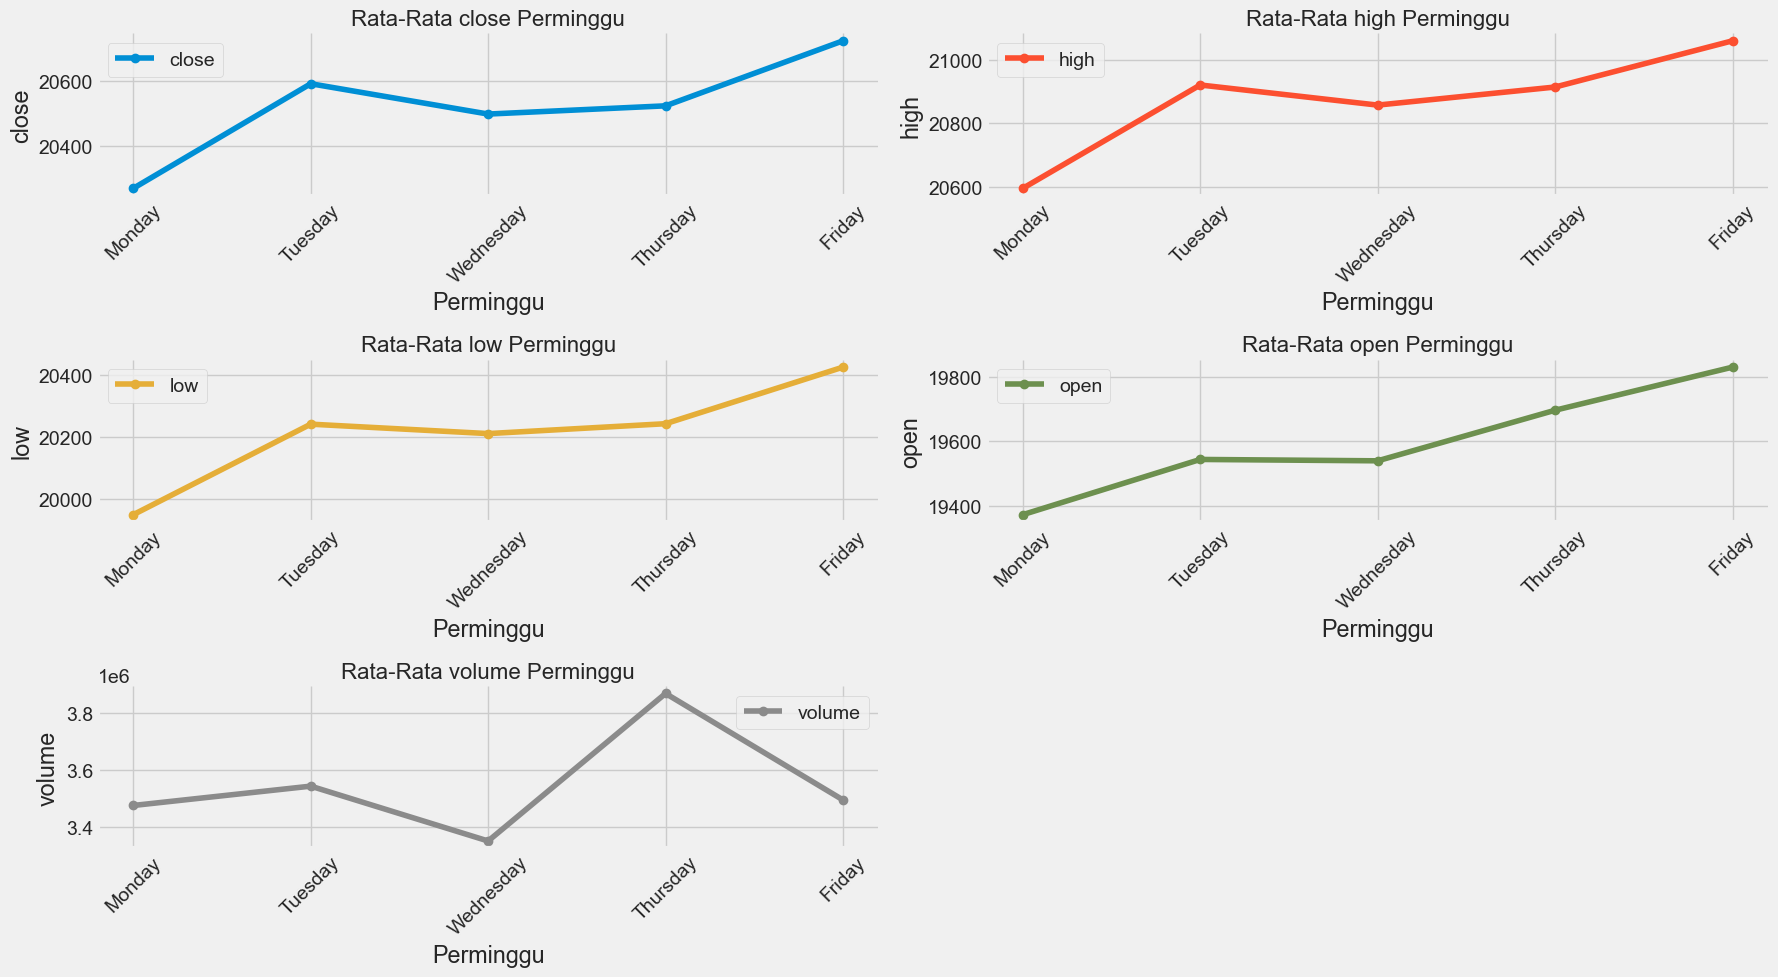

In [10]:
plt.rcParams['font.size'] = 14 #font size
plt.rcParams['figure.dpi'] = 100 #resolusi gambar
plt.rcParams['figure.figsize'] = (18, 10) #mengatur lebar dan tinggi gambar
colors = plt.rcParams["axes.prop_cycle"]() #mengambil siklus warna (color cycle) yang didefinisikan dalam konfigurasi Matplotlib
b1 = 3  # inisialisasi variabel Jumlah baris
b2 = 2  # inisialisasi variabel Jumlah kolom
b3 = 1  # inisialisasi plot

# membuat objek gambar (figure) 
fig = plt.figure()

#  mendefinisikan daftar nama kolom yang akan diplot pada grafik
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

# Looping setiap kolom
for column in columns_to_plot:
    color = next(colors)["color"] #Warna ini akan digunakan untuk plot garis pada grafik.
    plt.subplot(b1, b2, b3) # membuat subplot dalam gambar  mengatur jumlah baris, jumlah kolom, dan nomor subplot 
    
    # untuk menggambar data dalam bentuk grafik garis. Data yang digunakan adalah rerata (mean) dari kolom yang sedang diiterasi berdasarkan nama bulan
    plt.plot(stock_data.groupby(stock_data.index.day_name(), sort=False)[column].mean(), color=color, marker='o')
    # untuk menghapus garis batas atas dan kanan pada subplot, sehingga plot akan terlihat lebih bersih
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # memutar label sumbu x sebesar 45 derajat
    plt.xticks(rotation=45)
    # mengatur judul grafik dengan mencakup nama kolom yang sedang diiterasi
    plt.title(f"Rata-Rata {column} Perminggu", fontsize=16)
    # mengatur label sumbu x dan sumbu y pada grafik
    plt.xlabel('Perminggu')
    plt.ylabel(column)
    # menambahkan legenda (label keterangan) ke plot
    plt.legend([column])
    # Increment nomor subplot
    b3 += 1

# mengatur layout atau tata letak dari plot agar sesuai 
plt.tight_layout()
# melihat plot yang dihasilkan
plt.show()

# Modeling Dan Visualisasi MA 50 dan RSI

In [11]:
stock_data1 = pd.read_csv('itmg.csv') #import dataset ke dalam variabel stock_data1
stock_data1= pd.DataFrame(stock_data1) #dataframe
stock_data1 = stock_data1.drop(['symbol'],axis=1) #menghapus kolom symbol
stock_data1['date']= stock_data1['date'].str.split(" ", n = 1, expand = True)[0] #membagi kolom 'date' menjadi dua bagian dengan spasi 
### mengonversi kolom 'date' menjadi tipe data datetime
stock_data1['date']= pd.to_datetime(stock_data1['date'])

stock_data1

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2019-07-29,17075.0,17075.0,16875.0,17025.0,809000.0,17075.0,17075.0,16875.0,17025.0,809000.0
1,2019-07-30,16750.0,17100.0,16750.0,17100.0,518800.0,16750.0,17100.0,16750.0,17100.0,518800.0
2,2019-07-31,16825.0,16850.0,16775.0,16800.0,1769900.0,16825.0,16850.0,16775.0,16800.0,1769900.0
3,2019-08-01,16850.0,16900.0,16825.0,16825.0,841100.0,16850.0,16900.0,16825.0,16825.0,841100.0
4,2019-08-02,16850.0,16900.0,16700.0,16750.0,876200.0,16850.0,16900.0,16700.0,16750.0,876200.0
...,...,...,...,...,...,...,...,...,...,...,...
932,2023-05-19,24700.0,26200.0,24700.0,26200.0,4888400.0,24700.0,26200.0,24700.0,26200.0,4888400.0
933,2023-05-22,25175.0,25500.0,24850.0,25100.0,2915800.0,25175.0,25500.0,24850.0,25100.0,2915800.0
934,2023-05-23,25475.0,25750.0,25300.0,25500.0,1933200.0,25475.0,25750.0,25300.0,25500.0,1933200.0
935,2023-05-24,24950.0,25400.0,24775.0,25300.0,1815600.0,24950.0,25400.0,24775.0,25300.0,1815600.0


# MA(Moving Average) 50

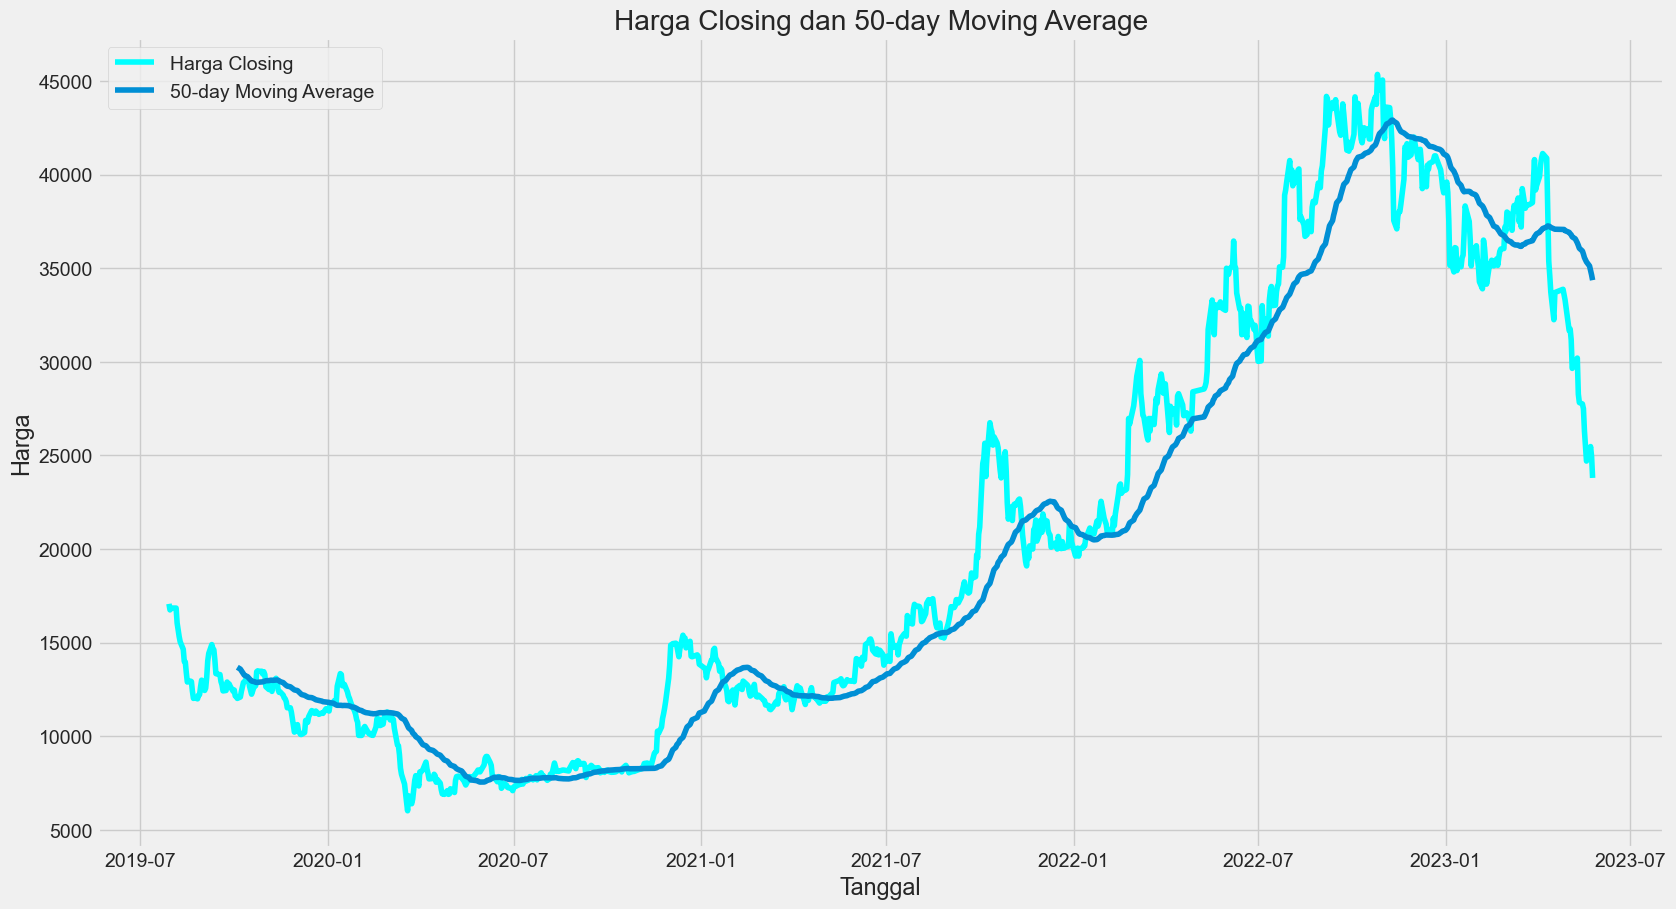

In [12]:
rolling_avg = stock_data1['close'].rolling(window=50).mean() #menghitung rata-rata 50 hari dari harga penutupan saham

plt.plot(stock_data1['date'], stock_data1['close'], label='Harga Closing',color='cyan') #Menggambar grafik,mengambil date, dan close
plt.plot(stock_data1['date'], rolling_avg, label='50-day Moving Average') #menggambar grafik,mengambil date, dan rata2 50 hari close
##plt.plot(stock_data1['date'], rolling_avg, label='20-day Moving Average')
plt.xlabel('Tanggal') #mengatur label sumbu x menjadi tanggal
plt.ylabel('Harga')   #mengatur label sumbu y menjadi harga
plt.title('Harga Closing dan 50-day Moving Average') #mengatur judul grafik atau title
  # menambahkan legenda (label keterangan) ke plot 
plt.legend()
#menampilkan hasil 
plt.show()

# RSI(Relative Strength Index)

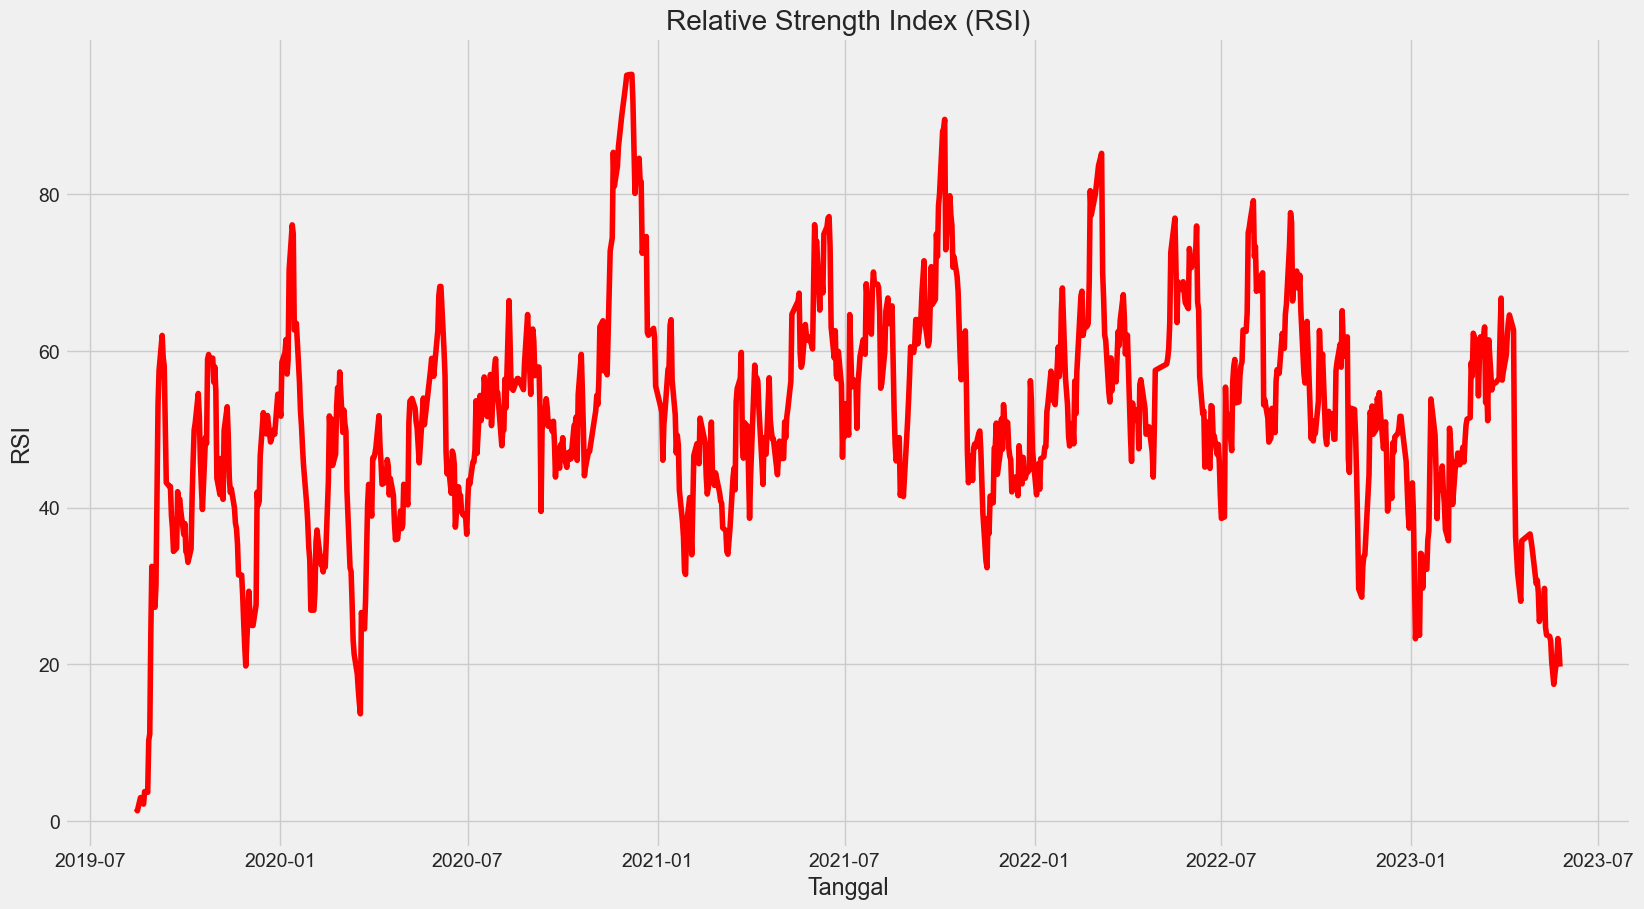

In [13]:
rsi = ta.momentum.RSIIndicator(stock_data1['close']).rsi() # menggunakan TA-Lib (Technical Analysis Library) untuk menghitung RSI dari data harga penutupan saham

plt.plot(stock_data1['date'], rsi, color='red')  #menggambar grafik, mengambil colom date
plt.xlabel('Tanggal') #mengatur label x menjadi tanggal
plt.ylabel('RSI') #mengatur label y menjadi RSI
plt.title('Relative Strength Index (RSI)') #mengatur judul atau title
plt.show() #menampilakn hasil

RSI = 100 - (100 / (1 + (Average Gain / Average Loss))

# Visualisasi dan Modeling LSTM

In [14]:
stock_data #melihat dataset

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
date,,,,,,,,,,
2019-07-29,17075.0,17075.0,16875.0,17025.0,809000.0,17075.0,17075.0,16875.0,17025.0,809000.0
2019-07-30,16750.0,17100.0,16750.0,17100.0,518800.0,16750.0,17100.0,16750.0,17100.0,518800.0
2019-07-31,16825.0,16850.0,16775.0,16800.0,1769900.0,16825.0,16850.0,16775.0,16800.0,1769900.0
2019-08-01,16850.0,16900.0,16825.0,16825.0,841100.0,16850.0,16900.0,16825.0,16825.0,841100.0
2019-08-02,16850.0,16900.0,16700.0,16750.0,876200.0,16850.0,16900.0,16700.0,16750.0,876200.0
...,...,...,...,...,...,...,...,...,...,...
2023-05-19,24700.0,26200.0,24700.0,26200.0,4888400.0,24700.0,26200.0,24700.0,26200.0,4888400.0
2023-05-22,25175.0,25500.0,24850.0,25100.0,2915800.0,25175.0,25500.0,24850.0,25100.0,2915800.0
2023-05-23,25475.0,25750.0,25300.0,25500.0,1933200.0,25475.0,25750.0,25300.0,25500.0,1933200.0


In [15]:
stock_data = stock_data[['high','low','open','close']] # extract colom yang telat di sesuaikan hanya 4 kolom

In [16]:
#melakukan penskalaan data ke dalam rentang tertentu
from sklearn.preprocessing import MinMaxScaler 
#membuat sebuah objek yang di simpan dalam variabel MMS
MMS = MinMaxScaler()
#melakukan penskalaan Min-Max pada DataFrame 
stock_data[stock_data.columns] = MMS.fit_transform(stock_data)

In [17]:
stock_data.shape #mendapatkan bentuk (shape) dari sebuah objek

(937, 4)

In [18]:
#digunakan untuk pelatihan (training size) dalam konteks pembagian data menjadi data pelatihan dan data pengujian (training and testing data) 80%:20%
training_size = round(len(stock_data) * 0.80) 
training_size

750

In [19]:
#split data
train_data = stock_data[:training_size] #data train
test_data  = stock_data[training_size:] #data test

train_data.shape, test_data.shape    #train dan tes tetap berjumlah 4 kolom dari shape

((750, 4), (187, 4))

# Visualisasi Pembagian Data Training dan Testing

Train dates : 2019-07-29 00:00:00 --- 2022-08-22 00:00:00  (n=750)
Test dates  : 2022-08-23 00:00:00 --- 2023-05-25 00:00:00  (n=187)



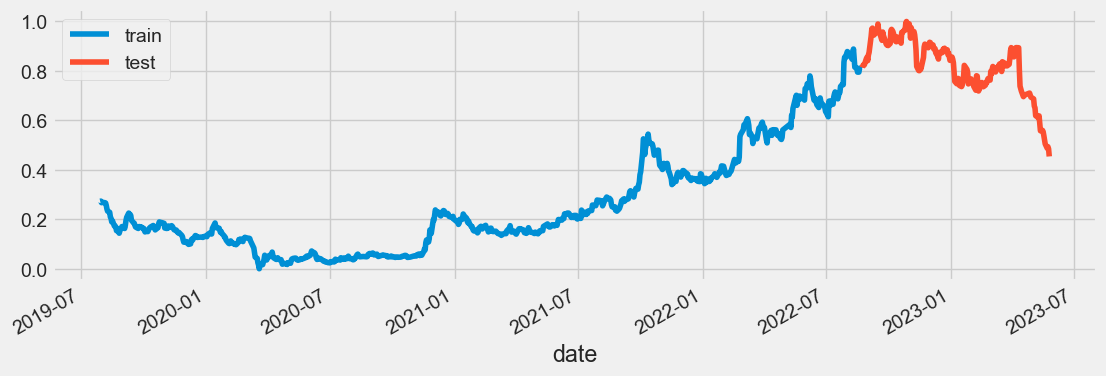

In [38]:
# train & test data split
# **************************************************************************************************************
size = 187  # last n days
train_data = stock_data[:-size]
test_data  = stock_data[-size:]

print(f"Train dates : {train_data.index.min()} --- {train_data.index.max()}  (n={len(train_data)})")
print(f"Test dates  : {test_data.index.min()} --- {test_data.index.max()}  (n={len(test_data)})")
print()


# plot the training & validation data
# **************************************************************************************************************

col = 'high'
fig, ax = plt.subplots(figsize=(12, 4))
train_data[col].plot(ax=ax, label='train')
test_data[col].plot(ax=ax, label='test')
ax.legend();

In [20]:
# fungsi untuk membuat sequence data training dan data testing ( membuat urutan data )

#menyimpan urutan data (sequences) dan label yang sesuai
def create_sequence(dataset):
  sequences = []
  labels = []
    
  start_idx = 0 #indeks awal dari rentang data

  for stop_idx in range(50,len(dataset)): # dimulai dari indeks 50 dan berakhir pada panjang dataset
    sequences.append(dataset.iloc[start_idx:stop_idx]) #mengumpulkan urutan data yang akan digunakan untuk pelatihan atau pengujian.
    labels.append(dataset.iloc[stop_idx]) #label yang sesuai dengan urutan data tersebut, dan label ini ditambahkan ke dalam list
    start_idx += 1 #Setiap kali kita selesai dengan satu iterasi akan ditambah 1
  return (np.array(sequences),np.array(labels)) #ubah menjadi numpy array dan mengembalikan keduanya sebagai tuple

In [21]:
#membuat urutan data pelatihan (training data) dan pengujian (testing data) 
X_train, y_train = create_sequence(train_data)
X_test, y_test = create_sequence(test_data)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape # shape memeriksa jumlah baris dan kolom setelah di split

((700, 50, 4), (700, 4), (137, 50, 4), (137, 4))

In [23]:
#import keras
from tensorflow.keras.layers import LSTM, Dropout, Dense
#membuat objek Sequential yang akan digunakan untuk menginisialisasi model secara berurutan
regressor = Sequential()

#Menambah lapisan LSTM angka 50 menandakan jumlah 4 unit neuron
#Lapisan Dropout digunakan untuk mengurangi overfitting dengan mengabaikan sejumlah unit neuron secara acak
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#menambahkan lapisan Dense (lapisan keluaran) dengan 4 unit neuron
regressor.add(Dense(units = 4))

#mengkompilasi model dengan menggunakan optimizer 'adam' (sebuah metode optimisasi yang efisien) dan fungsi kerugian 'mean_squared_error' (untuk masalah regresi) serta metric 'mean_absolute_error' untuk mengukur kinerja model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mean_absolute_error'])

#mencetak ringkasan model, yang memberikan informasi tentang jumlah parameter, bentuk lapisan, dan banyak detail lainnya tentang model
print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [24]:
#melatih model regressor menggunakan data pelatihan dan validasi Anda. Proses pelatihan akan berjalan selama 100 epochs, 
#akan dapat melihat perkembangan kinerja model selama pelatihan berkat data validasi.
#untuk meminimalkan kesalahan model pada data validasi dan menghasilkan model yang dapat melakukan prediksi yang baik
regressor.fit(X_train, y_train, epochs = 100,validation_data=(X_test, y_test), batch_size = 32)

Epoch 1/100
22/22 [==============================] - 14s 177ms/step - loss: 0.0354 - mean_absolute_error: 0.1308 - val_loss: 0.0120 - val_mean_absolute_error: 0.0872
Epoch 2/100
22/22 [==============================] - 2s 71ms/step - loss: 0.0076 - mean_absolute_error: 0.0622 - val_loss: 0.0088 - val_mean_absolute_error: 0.0764
Epoch 3/100
22/22 [==============================] - 3s 143ms/step - loss: 0.0058 - mean_absolute_error: 0.0537 - val_loss: 0.0083 - val_mean_absolute_error: 0.0670
Epoch 4/100
22/22 [==============================] - 3s 152ms/step - loss: 0.0057 - mean_absolute_error: 0.0540 - val_loss: 0.0076 - val_mean_absolute_error: 0.0663
Epoch 5/100
22/22 [==============================] - 3s 159ms/step - loss: 0.0057 - mean_absolute_error: 0.0542 - val_loss: 0.0100 - val_mean_absolute_error: 0.0875
Epoch 6/100
22/22 [==============================] - 4s 185ms/step - loss: 0.0052 - mean_absolute_error: 0.0515 - val_loss: 0.0099 - val_mean_absolute_error: 0.0734
Epoch 7/10

(Loss): Nilai-nilai loss menunjukkan tren penurunan sepanjang epoch, mengindikasikan bahwa model sedang memperbaiki kecocokannya dengan data training. loss dimulai dari 0.0336 dan mengalami penurunan secara progresif seiring berjalannya epoch. Kesalahan Rata-rata Absolut (MAE): Nilai-nilai MAE juga menunjukkan tren penurunan sepanjang epoch. MAE dimulai dari 0.1299 dan menguranginya seiring model belajar dari data pelatihan. (val_loss): Nilai-nilai vall_loss juga menunjukkan tren penurunan, menyarankan bahwa model sedang umumnya baik dalam memgeneralisasi data yang belum pernah dilihat sebelumnya. loss validasi dimulai dari 0.0096 dan menguranginya selama training. loss Rata-rata Absolut Validasi (MAE): Serupa dengan loss validasi, MAE validasi mengurangi nilainya sepanjang epoch. Ini mengindikasikan bahwa prediksi model pada data validasi menjadi lebih akurat. MAE validasi dimulai dari 0.0834 dan menguranginya seiring model berjalan

In [25]:
#membuat prediksi berdasarkan data pengujian (test data) 5 data pertama
test_predicted = regressor.predict(X_test)
test_predicted[:5]

5/5 [==============================] - 2s 24ms/step


array([[0.9735938 , 0.9710118 , 0.9930862 , 0.9721644 ],
       [0.9624987 , 0.96092975, 0.98400223, 0.9617073 ],
       [0.9443904 , 0.9440722 , 0.9690757 , 0.94429076],
       [0.94091296, 0.9405667 , 0.96641433, 0.9407209 ],
       [0.9474902 , 0.9463493 , 0.97193015, 0.94687676]], dtype=float32)

In [26]:
# mengambil data hasil prediksi yang telah disesuaikan dengan scaling dan mengembalikannya ke dalam skala aslinya
test_inverse_predicted = MMS.inverse_transform(test_predicted) # inversing scaling predidksi data
test_inverse_predicted[:5]

array([[44612.24 , 43640.84 , 45036.46 , 44255.363],
       [44176.203, 43246.375, 44624.5  , 43844.14 ],
       [43464.543, 42586.83 , 43947.582, 43159.234],
       [43327.88 , 42449.676, 43826.89 , 43018.848],
       [43586.363, 42675.918, 44077.03 , 43260.93 ]], dtype=float32)

In [27]:
#menggabungkan (merge) dua set data menggunakan perpustakaan Pandas (pandas.concat).

merge_data = pd.concat([stock_data.iloc[-137:].copy(),pd.DataFrame(test_inverse_predicted,columns=['high_predicted','low_predicted','open_predicted','close_predicted'],index=stock_data.iloc[-137:].index)], axis=1)

In [28]:
# memungkinkan  untuk membandingkan prediksi dengan data historis dengan lebih mudah dalam konteks skala aslinya
merge_data[['high','low','open','close']] = MMS.inverse_transform(merge_data[['high','low','open','close']]) # Inverse scaling

In [29]:
merge_data.head() #mengetahui beberapa barus pertama dari dataframe

,high,low,open,close,high_predicted,low_predicted,open_predicted,close_predicted
date,,,,,,,,
2022-11-01,44375.0,42100.0,44375.0,42300.0,44612.238281,43640.839844,45036.460938,44255.363281
2022-11-02,43000.0,41700.0,42525.0,41925.0,44176.203125,43246.375000,44624.500000,43844.140625
2022-11-03,44650.0,43250.0,43525.0,43600.0,43464.542969,42586.828125,43947.582031,43159.234375
2022-11-04,43975.0,43400.0,43575.0,43600.0,43327.878906,42449.675781,43826.890625,43018.847656
2022-11-07,44050.0,43350.0,43625.0,43575.0,43586.363281,42675.917969,44077.031250,43260.929688


# Visualisasi dari Harga Tertinggi Actual dan Prediksinya

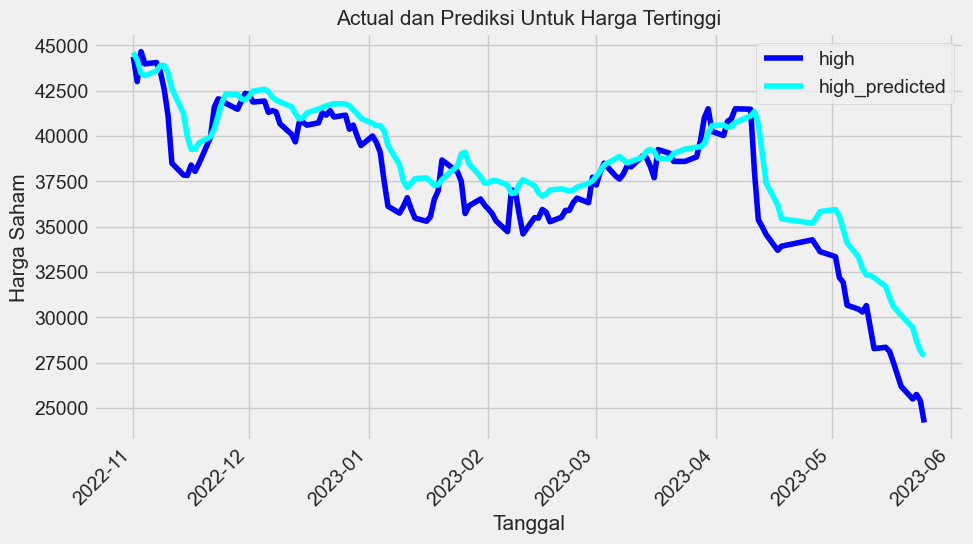

In [30]:
# membandingkan harga saham sebenarnya ('high') dengan prediksi harga tertinggi ('high_predicted') dalam suatu periode waktu.
merge_data[['high','high_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Tanggal',size=15)
plt.ylabel('Harga Saham',size=15)
plt.title('Actual dan Prediksi Untuk Harga Tertinggi',size=15)
plt.show()

In [31]:
# membuat DataFrame baru dan berlangsung selama 11-15 hari kedepan

merge_data_2 = merge_data.append(pd.DataFrame(columns=merge_data.columns,index=pd.date_range(start=merge_data.index[-1], periods=11, freq='D', closed='right')))

In [32]:
merge_data_2['2023-05-23':'2023-10-06']

,high,low,open,close,high_predicted,low_predicted,open_predicted,close_predicted
2023-05-23,25750.0,25300.0,25500.0,25475.0,28700.933594,28135.996094,28596.390625,28510.789062
2023-05-24,25400.0,24775.0,25300.0,24950.0,28155.009766,27604.761719,28008.455078,27976.433594
2023-05-25,24200.0,23600.0,24200.0,23800.0,27851.554688,27298.318359,27672.517578,27674.296875
2023-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#menggunakan DataFrame ini untuk menyimpan hasil prediksi atau data masa depan
upcoming_prediction = pd.DataFrame(columns=['high','low','open','close'],index=merge_data_2.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [34]:
#membuat prediksi harga saham untuk periode masa depan menggunakan model regresi (regressor)
curr_seq = X_test[-1:]

for i in range(-10,0):
  up_pred = regressor.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(X_test[-1:].shape)

1/1 [==============================] - 0s 23ms/step


In [35]:
#mengembalikan hasil prediksi model ke dalam skala aslinya sehingga hasilnya dapat digunakan atau dievaluasi dengan lebih baik dalam konteks data historis atau data aktual.
upcoming_prediction[['high','low','open','close']] = MMS.inverse_transform(upcoming_prediction[['high','low','open','close']])

# Visualisasi Kemungkinan Prediksi yang Akan Datang, dalam visualisasi ini dengan variabel High

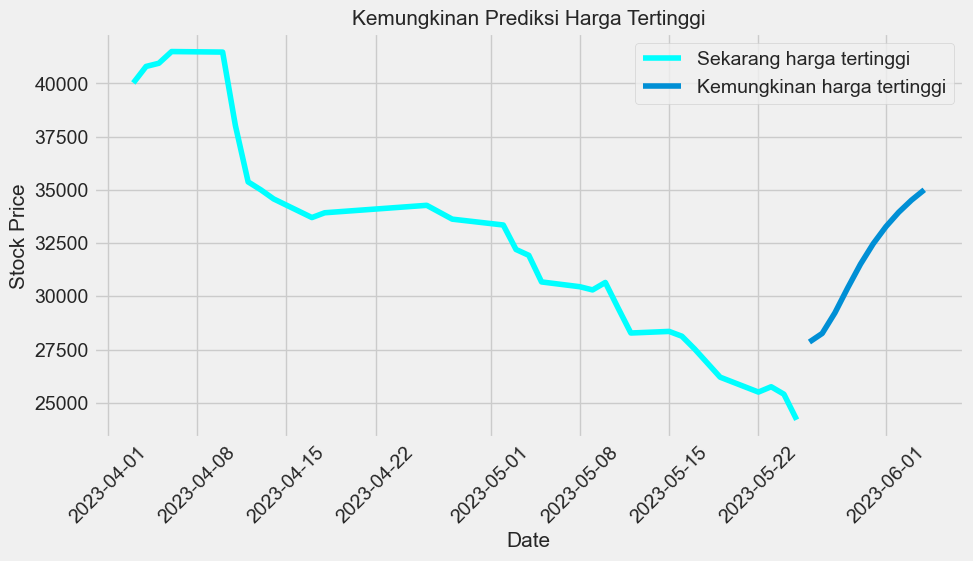

In [36]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2023-04-01':,'high'],label='Sekarang harga tertinggi',color='cyan')
ax.plot(upcoming_prediction.loc['2023-04-01':,'high'],label='Kemungkinan harga tertinggi')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Kemungkinan Prediksi Harga Tertinggi',size=15)
ax.legend()
fg.show()

# Evaluasi Model MSE, RMSE, R2 SCORE

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_predicted)
print("Mean Squared Error (MSE):", mse)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R-squared (R2) score
r2 = r2_score(y_test, test_predicted)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.0024781052852128707
Root Mean Squared Error (RMSE): 0.04978057136286074
R-squared (R2) Score: 0.7664844240931886
